In [17]:
library(dplyr)
library(magrittr)

In [18]:
###Cleaning Data

lcd_data = read.csv('~/Desktop/Research/Extension_1.18.18_deidentified.csv', stringsAsFactors = FALSE)

comparisons = lcd_data %>% filter(random != 5089 & random != 9502 & random != 6531) %>% select(c(7:206, 397)) %>% slice(3:99)

for (i in 1:200) {
  comparisons[, i] = as.integer(unlist(comparisons[, i]))
}

comparisons = comparisons %>% filter(attcheck1_1 > 90 & attcheck3_1 > 90 & attcheck5_1 > 90 & attcheck7_1 > 90 & attcheck9_1 > 90)

comparisons = comparisons[-c(21,42,63,84,100,121,142,163,184,200)]

In [19]:
###Generating vectors of compared numbers
numbers = c(5,14,16,9,29,8,11,20,18,21)
numbers2 = c(7,25,12,17,28,6,13,4,27,10)
num_mat = matrix(0,10,10)
for (i in 1:10) {
  num_mat[i,] = numbers
  numbers = numbers[c(2:10, 1)]
}

for (j in 1:10) {
  num_mat = cbind(num_mat, numbers2)
  numbers2 = numbers2[c(2:10,1)]
}

colnames(num_mat) = rep(NULL, 20)

In [20]:
###Generating vectors of compared fields
field1 <- c(rep(1, 10), rep(c(1, 11), 5))
field2 <- c(2,16,3,17,4,18,5,19,6,20,11,rep(12:15, each = 2), 16)

In [21]:
###Changing columns into numbers that are compared
x = 0
f1 = 1
f2 = 1
while (i + x <= 190) {
  if (x == 80 | x == 185) {
    for (i in 1:5) {
    colnames(comparisons)[i + x] = paste0(num_mat[i, field1[f1]], "/", num_mat[i, field2[f2]])
    }
    f1 = f1 + 1
    f2 = f2 + 1
    x = x + 5
    next
  } else {
    for (i in 1:10) {
    colnames(comparisons)[i + x] = paste0(num_mat[i, field1[f1]], "/", num_mat[i, field2[f2]])
    }
  }
  x = x + 10
  f1 = f1 + 1
  f2 = f2 + 1
  i = 5
}

## A Preliminary Analysis of the Demographics of our Survey Data
The categories of the demographic data of the study's participants included gender, ethnicity, age, math anxiety level, college semesters enrolled in, current occupation, and degree of math used in the participant's profession. The participants were asked to select among a list numbers that shared certain features, such as odd/evenness, multiples of certain numbers, and squares. The total "score" was computed by subtracting the number of numbers incorrectly categorized from the number of numbers correctly categorized.

In [22]:
###Creating Table of Demographics and Scores
demo = lcd_data %>% slice(3:102) %>% filter(random != 5089 & random != 9502 & random != 6531)

for (i in 1:200) {
  demo[, i] = as.integer(unlist(demo[, i]))
}

demo = demo %>% filter(attcheck1_1 > 90 & attcheck3_1 > 90 & attcheck5_1 > 90 & attcheck7_1 > 90 & attcheck9_1 > 90) %>% select(367:395)

demo[, c(1,2,14:29)] = as.integer(unlist(demo[, c(1,2,14:29)]))

colnames(demo)[1] = "anxiety"
colnames(demo)[14:21] = paste0("r", 0:7)
colnames(demo)[22:29] = paste0("w", 0:7)

demo = demo %>% mutate(score = r0+r1+r2+r3+r4+r5+r6+r7-w0-w1-w2-w3-w4-w5-w6-w7)

Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”

At first, I tried to perform linear regression between the score and variables such as math anxiety level and age. However, the results seemed rather dismal, as can be seen both by the graph and the tiny r-squared value of the regression. Part of the problem may be the fact that these variables only take in a limited amount of discrete numbers, but also, there may not be a significant correlation between the participants' scores and their age or math anxiety level.


Call:
lm(formula = demo$score ~ demo$anxiety)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.744  -3.062   2.583   3.602   7.218 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.0143     1.3042  36.816   <2e-16 ***
demo$anxiety  -0.6540     0.2712  -2.411   0.0181 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.861 on 82 degrees of freedom
Multiple R-squared:  0.0662,	Adjusted R-squared:  0.05482 
F-statistic: 5.814 on 1 and 82 DF,  p-value: 0.01814



Call:
lm(formula = demo$score ~ demo$age, data = demo)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.602  -2.549   2.547   4.074   5.164 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 43.72966    2.48470  17.600   <2e-16 ***
demo$age     0.04256    0.06602   0.645    0.521    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.05 on 82 degrees of freedom
Multiple R-squared:  0.005042,	Adjusted R-squared:  -0.007092 
F-statistic: 0.4155 on 1 and 82 DF,  p-value: 0.521


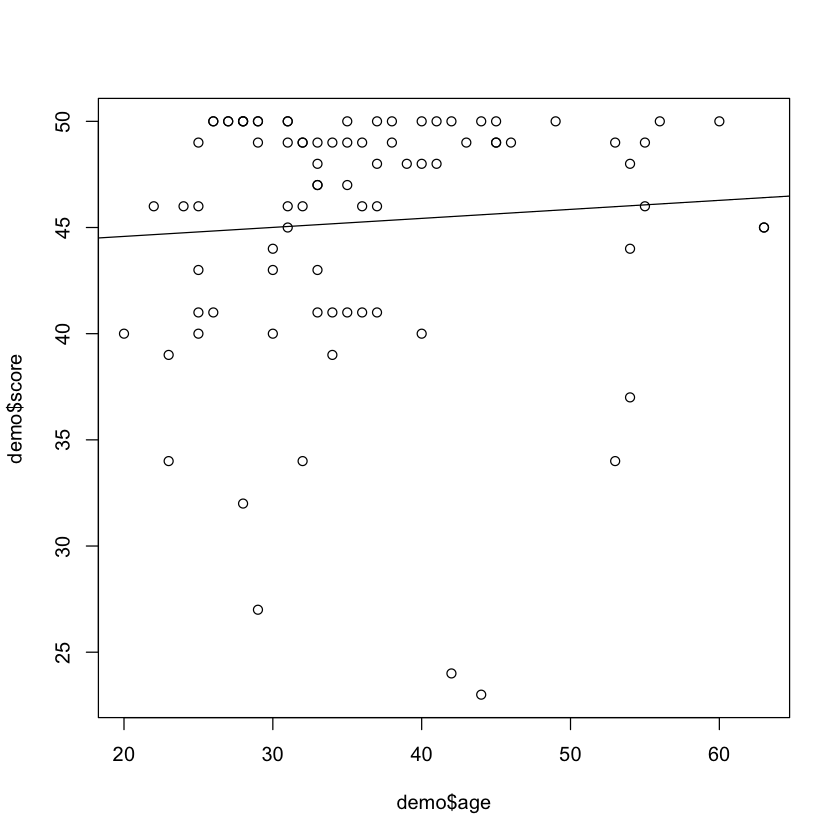

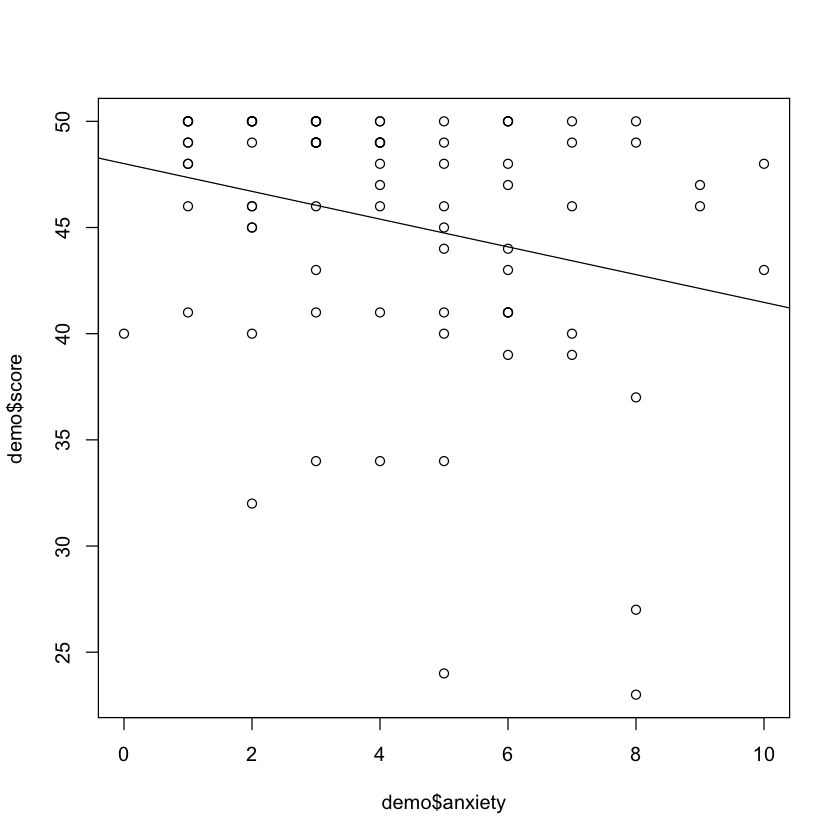

In [23]:
###Attempt at Regression Analysis: Doesn't work very well
score_vs_anxiety = lm(demo$score ~ demo$anxiety)
summary(score_vs_anxiety)

score_vs_age = lm(demo$score ~ demo$age, demo)
summary(score_vs_age)

plot(demo$age, demo$score)
abline(score_vs_age)

plot(demo$anxiety, demo$score)
abline(score_vs_anxiety)

The distribution of the scores themselves is rather skewed to the left, probably due to the fact that many of the participants were able to generally categorize most numbers correctly according to feature, resulting in a high amount of scores near the attainable maximum, 50, and a pretty high average of about 45.

[1] 45.27381

[1] 48

[1] 6.028749

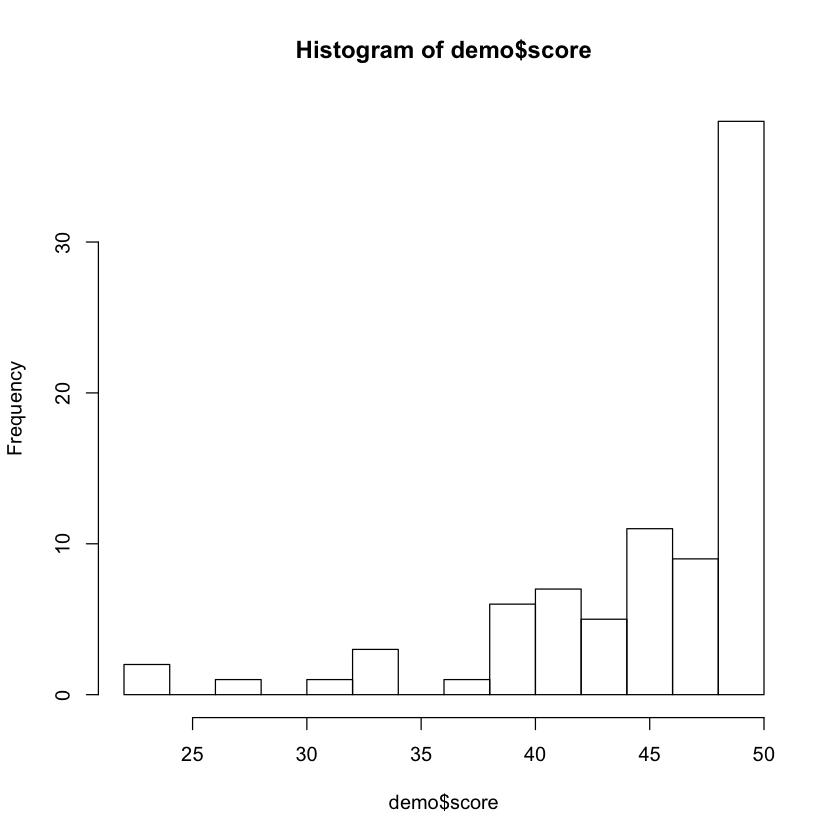

In [24]:
###Misc Analysis
hist(demo$score, breaks = 10)
mean(demo$score)
median(demo$score)
sd(demo$score)

The math anxiety levels of the participants seems relatively low, observed by the general concentration of observations in the lower half of the 1-10 scale, along with the mean of 4.19.

[1] 4.190476

[1] 4

[1] 2.371905

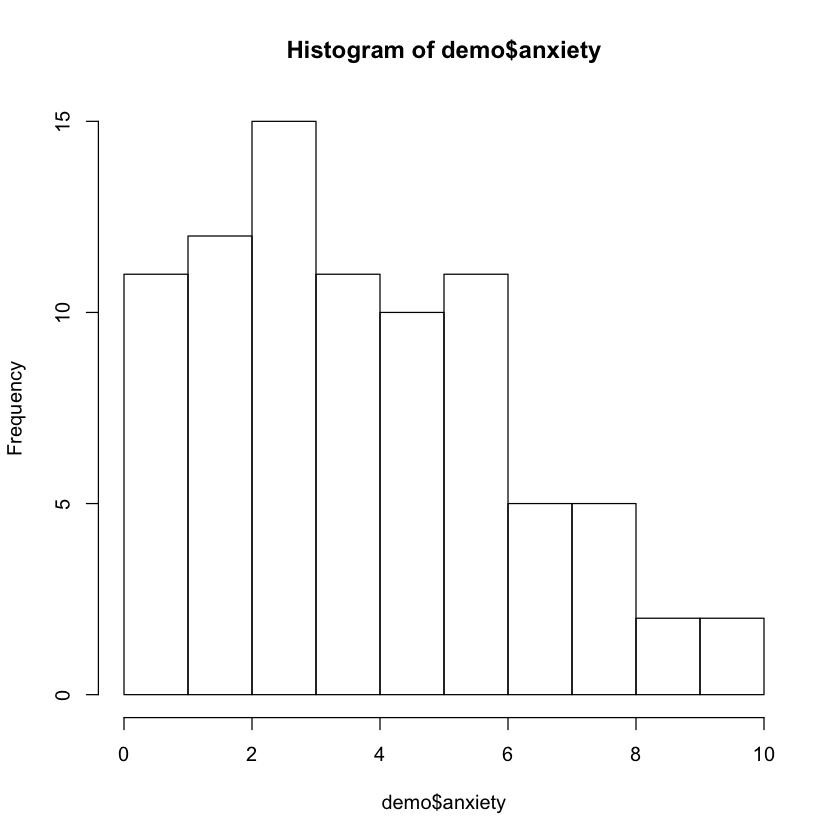

In [25]:
hist(demo$anxiety)
mean(demo$anxiety)
median(demo$anxiety)
sd(demo$anxiety)

I made tables of the average scores of certain groups, divided by gender, ethnicity, math anxiety, college semesters taken, type of profession, and math anxiety level. In these tables, I also included a column "freq", for how many participants were in each category. Note that many of the groups' sizes are not that big, so the averages shown below are by no means representative of the performance of the entire demographic group.

#### Average Scores by Gender

In [26]:
gen_count = demo %>% count(gender)
demo %>% group_by(gender) %>% summarise(mean = mean(score)) %>% mutate(freq = gen_count$n) %>% arrange(desc(mean))

gender,mean,freq
Female,46.41176,34
Male,44.50000,50


#### Average Scores by Ethnicity

In [27]:
eth_count = demo %>% count(ethnicity)
demo %>% group_by(ethnicity) %>% summarise(mean = mean(score)) %>% mutate(freq = eth_count$n) %>% arrange(desc(mean))

ethnicity,mean,freq
Asian,46.60000,5
Hispanic or Latino,45.75000,4
White,45.24638,69
Black or African American,44.16667,6


#### Average Scores by Use of Math in Profession

In [28]:
math_count = demo %>% count(math_freq)
demo %>% group_by(math_freq) %>% summarise(mean = mean(score)) %>% mutate(freq = math_count$n) %>% arrange(desc(mean))

math_freq,mean,freq
Yearly,48.00000,3
Weekly,46.35294,34
Daily,45.50000,32
Less than once a year,42.16667,12
Hourly,40.33333,3


#### Average Scores by College Semesters Enrolled

In [29]:
sem_count = demo %>% count(college_semesters)
demo %>% group_by(college_semesters) %>% summarise(mean = mean(score)) %>% mutate(freq = sem_count$n)

college_semesters,mean,freq
,46.00000,2
0,44.14286,14
1,46.00000,4
2,42.50000,8
3,47.75000,4
4,43.50000,12
5 or more,46.40000,40


#### Average Scores by Type of Profession

In [30]:
pro_count = demo %>% count(profession)
demo %>% group_by(profession) %>% summarise(mean = mean(score)) %>% mutate(freq = pro_count$n) %>% arrange(desc(mean)) 

profession,mean,freq
Architecture and Engineering Occupations,50.00000,2
Protective Service Occupations,49.00000,1
Computer and Mathematical Occupations,48.81818,11
Food Preparation and Serving Related Occupations,48.57143,7
"Installation, Maintenance, and Repair Occupations",47.50000,2
Construction and Extraction Occupations,47.00000,5
"Life, Physical, and Social Science Occupations",46.00000,1
Office and Administrative Support Occupations,45.87500,8
"Education, Training, and Library Occupations",45.66667,6
Transportation and Materials Moving Occupations,45.50000,2


#### Average Scores by Math Anxiety Level

In [31]:
anx_count = demo %>% count(anxiety) 
demo %>% group_by(anxiety) %>% summarise(mean = mean(score)) %>% mutate(freq = anx_count$n)

anxiety,mean,freq
0,40.00000,1
1,48.10000,10
2,46.08333,12
3,47.20000,15
4,46.54545,11
5,42.10000,10
6,44.90909,11
7,44.80000,5
8,37.20000,5
9,46.50000,2


#### Average Scores by Age Group

In [32]:
c1 = cut(demo$age, breaks = seq(20, 70, by = 10), include.lowest = T)
tapply(demo$score, c1, mean)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying an object: 

[20,30]  (30,40]  (40,50]  (50,60]  (60,70] 
44.23077 46.14286 45.08333 45.22222 45.00000

In [33]:
lcd_data_w = read.csv('sim_data_with_weights.csv')
weights = lcd_data_w[,438:459]

We used Michael Lee's ADCLUS2 algorithm to generate weights for each feature of numbers, based on participants' similarity judgments of different pairs of numbers. The weights represent how significant each feature was factored into the similarity judgments. The higher the weight, the more likely the subject used that particular feature to make the judgments. For each feature, I then compared the weights between the first group of numbers and the second group using linear regression.

#### Linear Regression between weights of small numbers (1~10)


Call:
lm(formula = weights$small1 ~ weights$small2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39066 -0.07778  0.00195  0.07306  0.30261 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.05481    0.02575   2.128   0.0363 *  
weights$small2  0.57590    0.08515   6.763 1.84e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1247 on 82 degrees of freedom
Multiple R-squared:  0.3581,	Adjusted R-squared:  0.3502 
F-statistic: 45.74 on 1 and 82 DF,  p-value: 1.841e-09


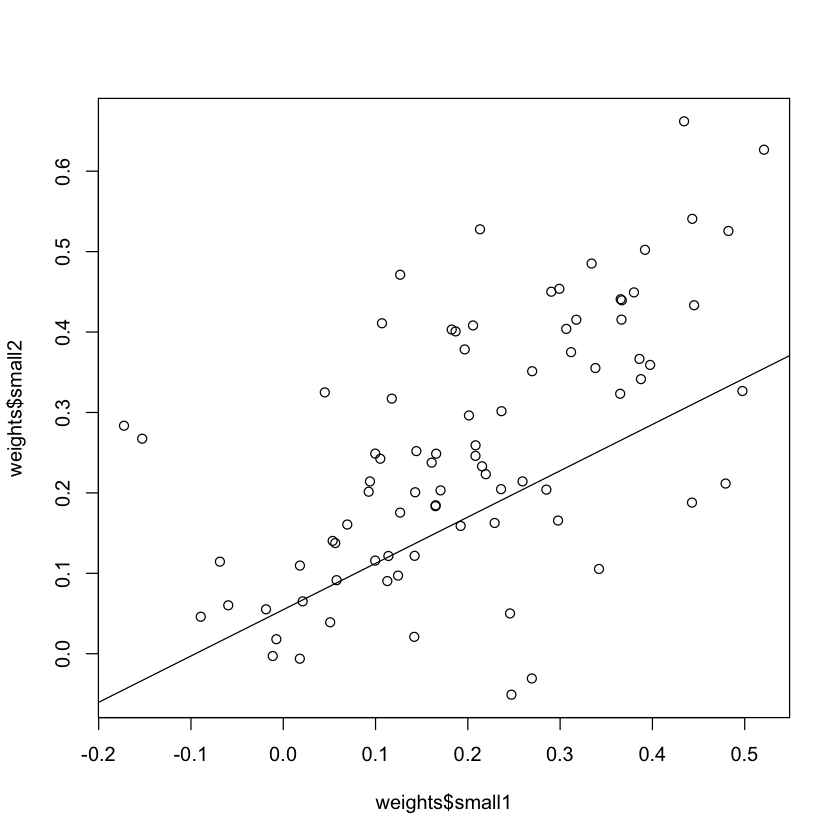

In [34]:
small_lm = lm(weights$small1 ~ weights$small2)
plot(weights$small1, weights$small2)
abline(small_lm)
summary(small_lm)

#### Linear Regression between weights of medium numbers (11~20)


Call:
lm(formula = weights$med1 ~ weights$med2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19276 -0.03865 -0.00218  0.04415  0.21632 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.007102   0.012839   0.553    0.582    
weights$med2 0.523587   0.054915   9.534 6.24e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07566 on 82 degrees of freedom
Multiple R-squared:  0.5258,	Adjusted R-squared:   0.52 
F-statistic: 90.91 on 1 and 82 DF,  p-value: 6.236e-15


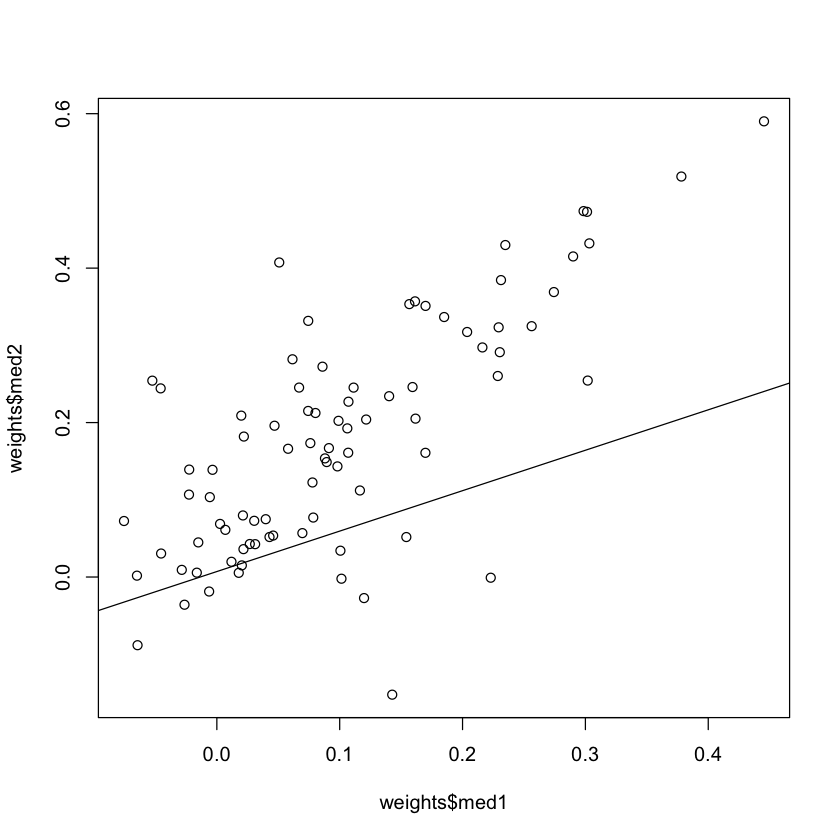

In [35]:
med_lm = lm(weights$med1 ~ weights$med2)
plot(weights$med1, weights$med2)
abline(med_lm)
summary(med_lm)

#### Linear Regression between weights of big numbers (21~30)


Call:
lm(formula = weights$large1 ~ weights$large2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18127 -0.06750  0.00073  0.06707  0.24383 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.05751    0.02208   2.604   0.0109 *  
weights$large2  0.43307    0.05510   7.860 1.32e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09517 on 82 degrees of freedom
Multiple R-squared:  0.4297,	Adjusted R-squared:  0.4228 
F-statistic: 61.79 on 1 and 82 DF,  p-value: 1.32e-11


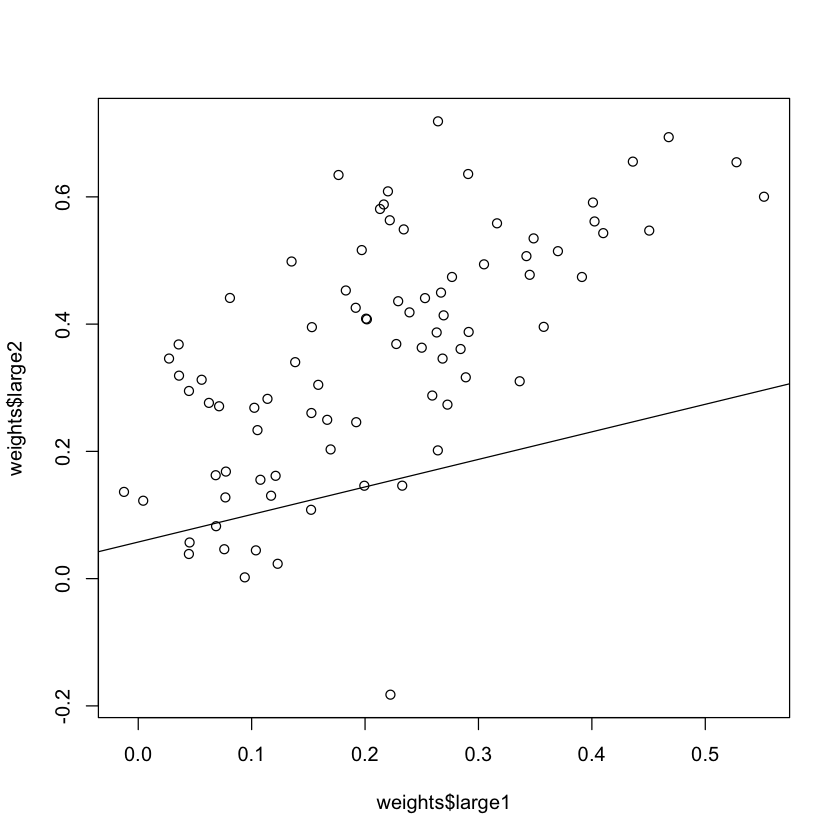

In [36]:
large_lm = lm(weights$large1 ~ weights$large2)
plot(weights$large1, weights$large2)
abline(large_lm)
summary(large_lm)

#### Linear Regression between weights of even numbers


Call:
lm(formula = weights$even1 ~ weights$even2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16330 -0.05015 -0.00816  0.03366  0.32111 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.07200    0.01351   5.329 8.49e-07 ***
weights$even2  0.74878    0.06299  11.887  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.081 on 82 degrees of freedom
Multiple R-squared:  0.6328,	Adjusted R-squared:  0.6283 
F-statistic: 141.3 on 1 and 82 DF,  p-value: < 2.2e-16


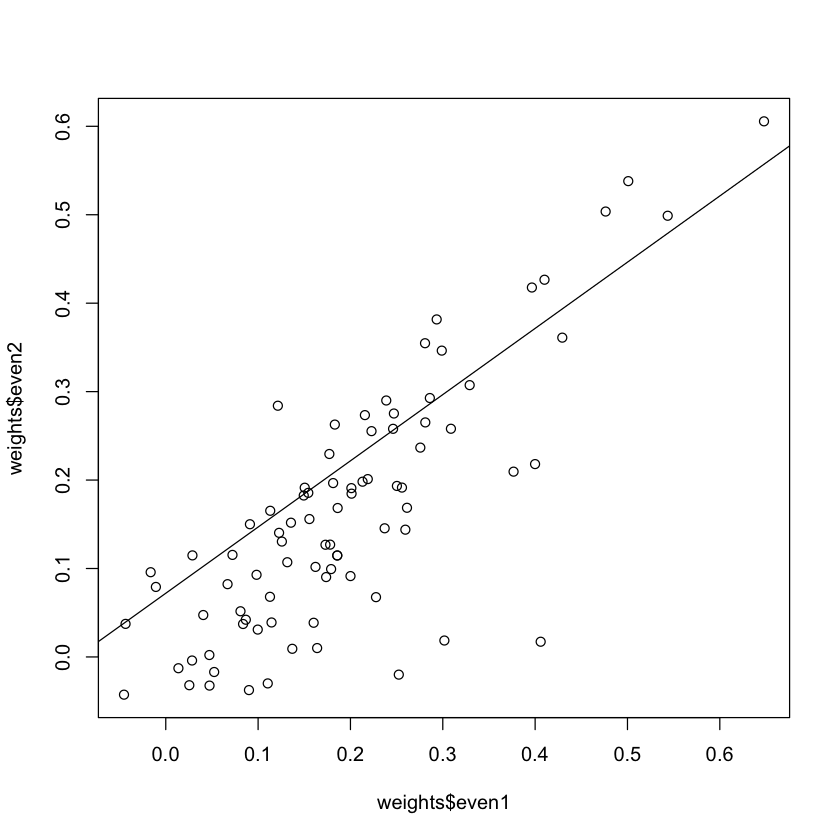

In [43]:
even_lm = lm(weights$even1 ~ weights$even2)
plot(weights$even1, weights$even2)
abline(even_lm)
summary(even_lm)

#### Linear Regression between weights of odd numbers


Call:
lm(formula = weights$odd1 ~ weights$odd2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.149873 -0.041663 -0.006002  0.038672  0.198064 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.002369   0.009775  -0.242    0.809    
weights$odd2  0.418873   0.092309   4.538 1.93e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07077 on 82 degrees of freedom
Multiple R-squared:  0.2007,	Adjusted R-squared:  0.191 
F-statistic: 20.59 on 1 and 82 DF,  p-value: 1.926e-05


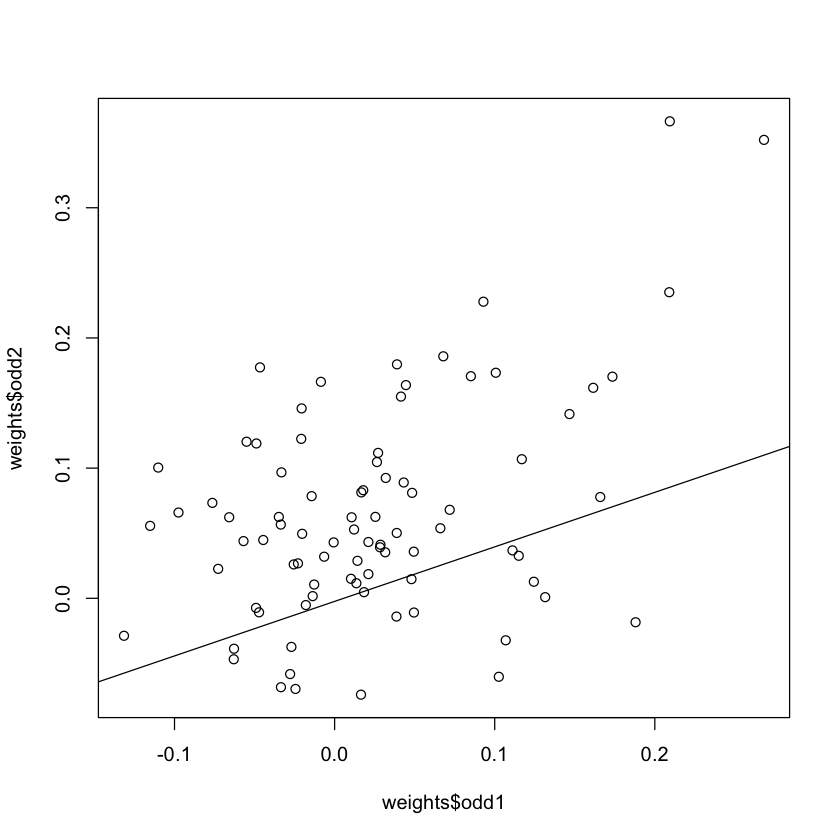

In [42]:
odd_lm = lm(weights$odd1 ~ weights$odd2)
plot(weights$odd1, weights$odd2)
abline(odd_lm)
summary(odd_lm)

#### Linear Regression between weights of multiples of 3


Call:
lm(formula = weights$mult31 ~ weights$mult32)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28803 -0.08537  0.00341  0.08054  0.36172 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.13059    0.01553   8.410 1.07e-12 ***
weights$mult32  0.42563    0.12145   3.504 0.000744 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1308 on 82 degrees of freedom
Multiple R-squared:  0.1303,	Adjusted R-squared:  0.1197 
F-statistic: 12.28 on 1 and 82 DF,  p-value: 0.0007442


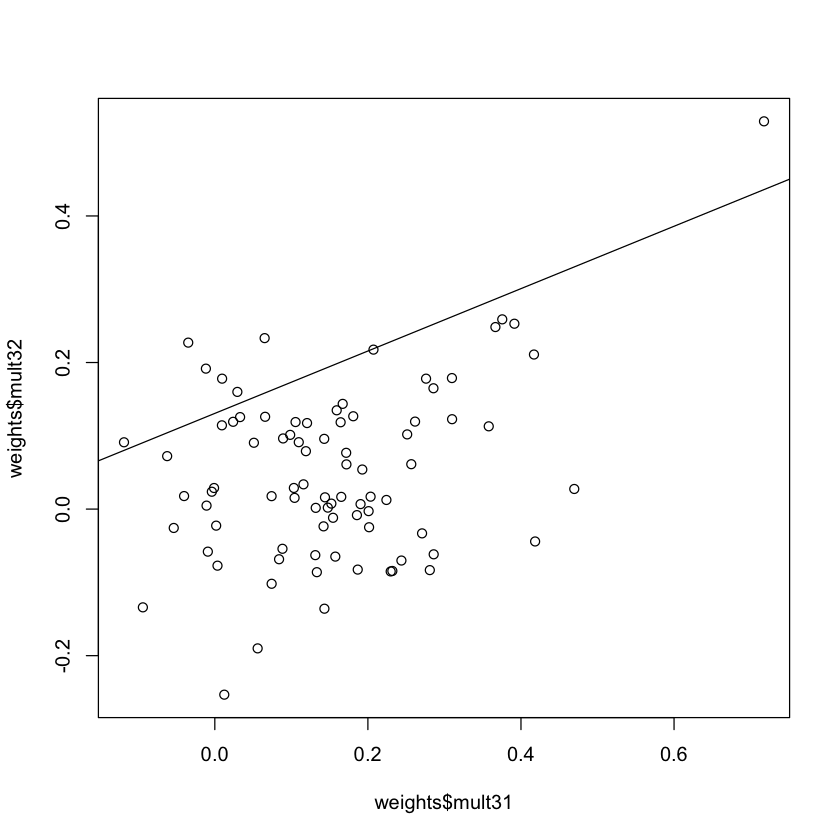

In [41]:
mult3_lm = lm(weights$mult31 ~ weights$mult32)
plot(weights$mult31, weights$mult32)
abline(mult3_lm)
summary(mult3_lm)

#### Linear Regression between weights of multiples of 4


Call:
lm(formula = weights$mult41 ~ weights$mult42)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.294256 -0.054790 -0.001472  0.069495  0.279319 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.002442   0.012356  -0.198 0.843807    
weights$mult42  0.377907   0.096853   3.902 0.000195 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1131 on 82 degrees of freedom
Multiple R-squared:  0.1566,	Adjusted R-squared:  0.1463 
F-statistic: 15.22 on 1 and 82 DF,  p-value: 0.0001947


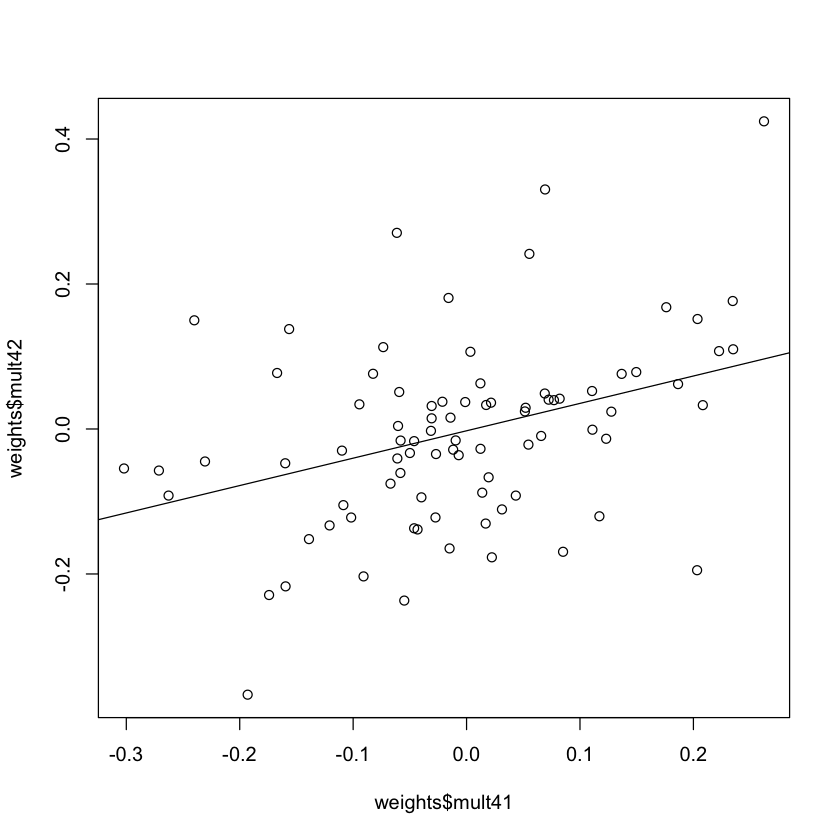

In [40]:
mult4_lm = lm(weights$mult41 ~ weights$mult42)
plot(weights$mult41, weights$mult42)
abline(mult4_lm)
summary(mult4_lm)

#### Linear Regression between weights of multiples of 5


Call:
lm(formula = weights$mult51 ~ weights$mult52)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53410 -0.17080 -0.02428  0.15777  0.65546 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.05700    0.03231   1.764   0.0814 .  
weights$mult52  0.66006    0.12541   5.263 1.11e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2447 on 82 degrees of freedom
Multiple R-squared:  0.2525,	Adjusted R-squared:  0.2434 
F-statistic:  27.7 on 1 and 82 DF,  p-value: 1.112e-06


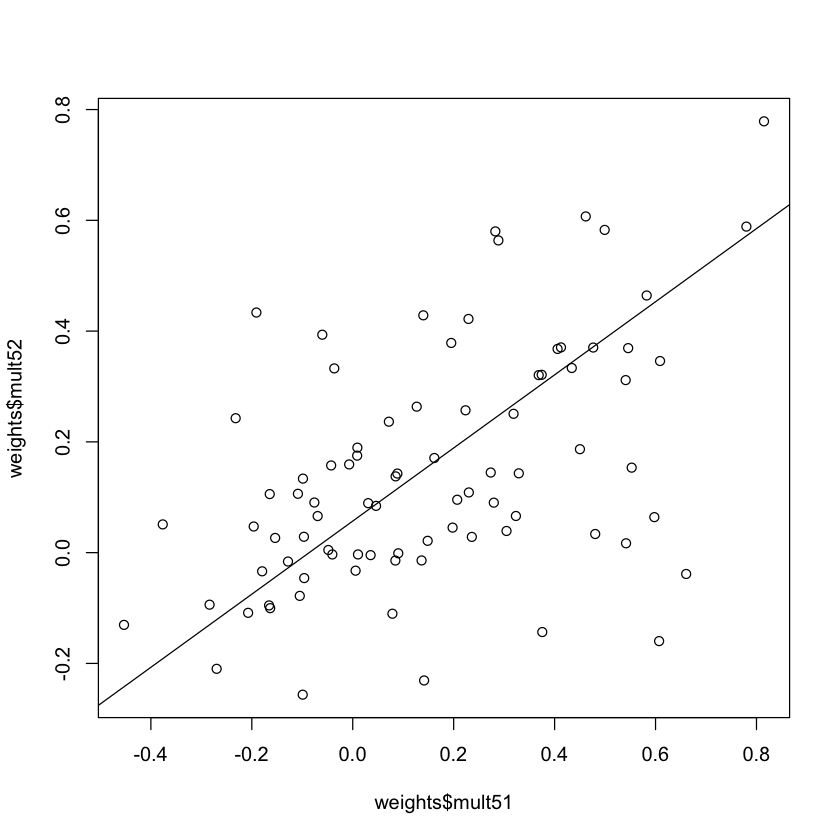

In [39]:
mult5_lm = lm(weights$mult51 ~ weights$mult52)
plot(weights$mult51, weights$mult52)
abline(mult5_lm)
summary(mult5_lm)

#### Linear Regression between weights of multiples of 7


Call:
lm(formula = weights$mult71 ~ weights$mult72)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39751 -0.14627  0.00555  0.14876  0.35593 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.08798    0.02332   3.774 0.000303 ***
weights$mult72  0.40526    0.07779   5.210 1.38e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.186 on 82 degrees of freedom
Multiple R-squared:  0.2487,	Adjusted R-squared:  0.2395 
F-statistic: 27.14 on 1 and 82 DF,  p-value: 1.382e-06


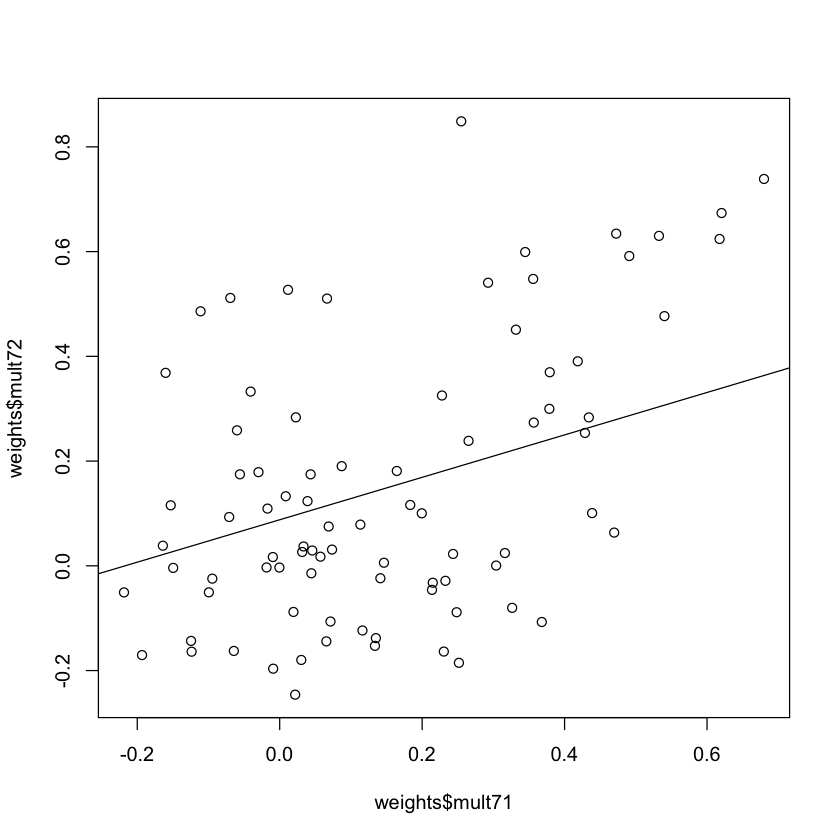

In [38]:
mult7_lm = lm(weights$mult71 ~ weights$mult72)
plot(weights$mult71, weights$mult72)
abline(mult7_lm)
summary(mult7_lm)

#### Linear Regression between weights of perfect squares


Call:
lm(formula = weights$square1 ~ weights$square2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28332 -0.11503 -0.04447  0.08994  0.53985 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      0.06627    0.01967   3.369  0.00115 **
weights$square2  0.41061    0.13064   3.143  0.00233 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1741 on 82 degrees of freedom
Multiple R-squared:  0.1075,	Adjusted R-squared:  0.09663 
F-statistic: 9.879 on 1 and 82 DF,  p-value: 0.002328


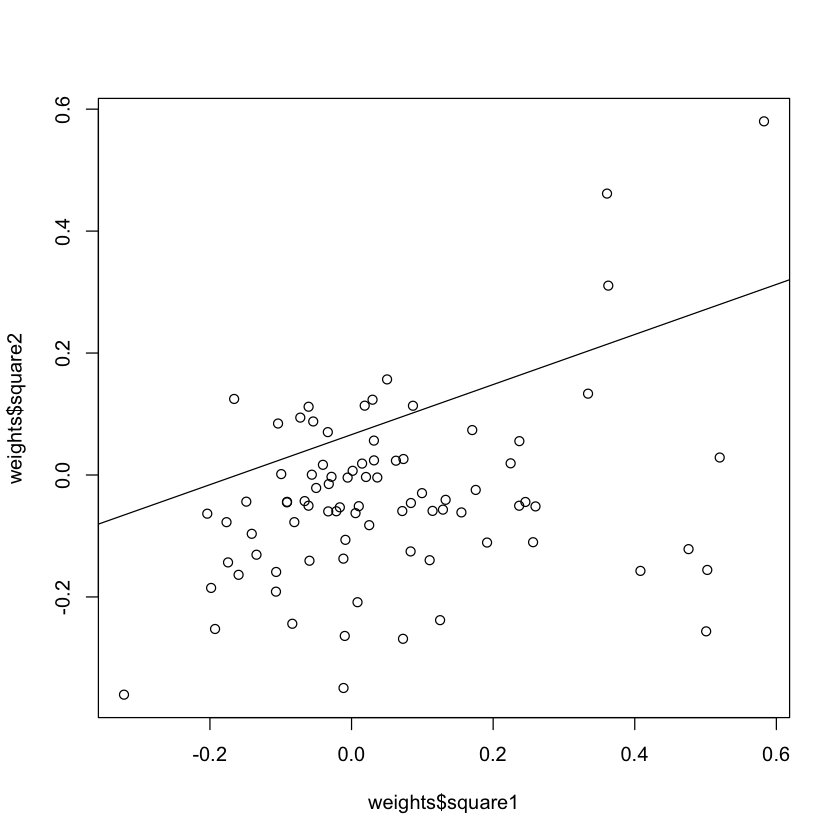

In [37]:
square_lm = lm(weights$square1 ~ weights$square2)
plot(weights$square1, weights$square2)
abline(square_lm)
summary(square_lm)

#### Linear Regression between weights of prime numbers


Call:
lm(formula = weights$prime1 ~ weights$prime2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30187 -0.06940  0.01187  0.06082  0.40634 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.06668    0.01446  -4.612 1.45e-05 ***
weights$prime2 -0.06450    0.10560  -0.611    0.543    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1155 on 82 degrees of freedom
Multiple R-squared:  0.004528,	Adjusted R-squared:  -0.007612 
F-statistic: 0.373 on 1 and 82 DF,  p-value: 0.5431


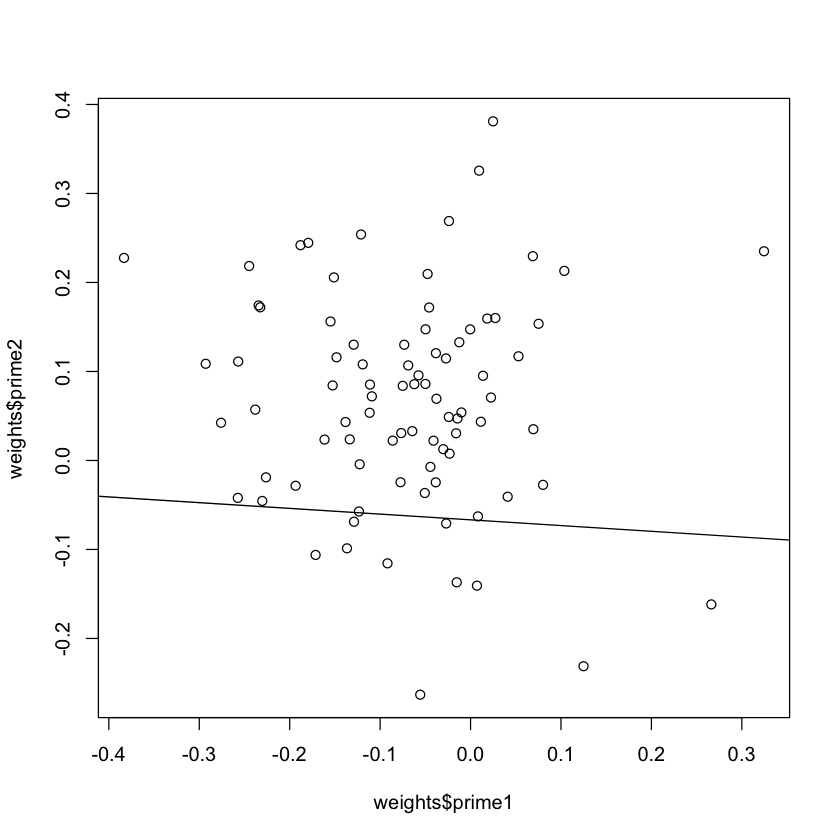

In [44]:
prime_lm = lm(weights$prime1 ~ weights$prime2)
plot(weights$prime1, weights$prime2)
abline(prime_lm)
summary(prime_lm)

Below, I gathered all the r-squared values from all the features, and put them in decreasing order. It seems like the regression worked relatively well with even numbers and numbers grouped by magnitude (small/medium/large), while perfect squares and primes seemed to have the worst regression results.

In [45]:
r_squared = c(summary(small_lm)$r.squared,
              summary(med_lm)$r.squared,
              summary(large_lm)$r.squared,
              summary(even_lm)$r.squared,
              summary(odd_lm)$r.squared,
              summary(mult3_lm)$r.squared,
              summary(mult4_lm)$r.squared,
              summary(mult5_lm)$r.squared,
              summary(mult7_lm)$r.squared,
              summary(square_lm)$r.squared,
              summary(prime_lm)$r.squared)
names(r_squared) = c('small', 'med', 'large', 'even', 'odd', 'mult3', 'mult4', 'mult5', 'mult7', 'square', 'prime')
sort(r_squared, decreasing = T)

even         med       large       small       mult5       mult7 
0.632785652 0.525754435 0.429705473 0.358067012 0.252509870 0.248665464 
        odd       mult4       mult3      square       prime 
0.200710238 0.156590991 0.130261442 0.107517287 0.004528088

I also took the average for each feature and put all the averages in decreasing order. It seems like numbers grouped by magnitude and even numbers had the greatest weights, while the square and prime numbers still were at the bottom. Peculiarly, multiples of 4 had the lowest average weight, while its similar feature evenness topped both lists.

In [46]:
avg_avgs = c()
for (i in 1:11) {
  avg_avgs[i] = mean(c(avgs[2*i - 1], avgs[2*i]))
  names(avg_avgs)[i] = names(r_squared)[i]
}

sort(avg_avgs, decreasing = T)

large        small         even        mult5        mult7          med 
 0.282219686  0.229732372  0.177864769  0.149006355  0.147756355  0.139949734 
       mult3          odd       square        prime        mult4 
 0.101180785  0.044883817  0.005553974 -0.001949261 -0.006140160

In [44]:
###Creating 3D matrix of all 84 participants, 20 numbers
numbers3 = as.character(c(numbers, numbers2))

all_sim_mat = array(0, dim = c(20,20,84))

for (i in 1:84) {
  ind = comparisons[i, ]
  ind_sim_mat = matrix(0,20,20)
  rownames(ind_sim_mat) = numbers3
  colnames(ind_sim_mat) = numbers3
  for (j in 1:20) {
    ind_sim_mat[j, j] = 100
  }
  for (k in 1:190) {
    nums = unlist(strsplit(names(ind)[k], split = "/"))
    ind_sim_mat[nums[1], nums[2]] = ind[[k]]
    ind_sim_mat[nums[2], nums[1]] = ind[[k]]
  }
  all_sim_mat[,,i] = ind_sim_mat
}

###Accessing matrices
all_sim_mat[,,1]

100,35,2,15,16,28,26,74,43,37,27,62,18,15,23,54,34,17,15,58
35,100,75,22,15,48,29,41,46,88,63,23,52,38,79,29,52,43,18,55
2,75,100,43,15,75,22,24,46,21,20,13,42,54,54,20,43,38,39,56
15,22,43,100,34,55,19,18,47,23,23,15,22,19,20,70,20,10,19,59
16,15,15,34,100,29,37,5,26,17,36,25,36,19,33,14,25,16,63,15
28,48,75,55,29,100,29,54,18,29,47,26,54,23,24,48,48,64,11,80
26,29,22,19,37,29,100,28,51,14,12,30,80,13,13,17,17,18,20,21
74,41,24,18,5,54,28,100,64,65,13,18,36,38,50,19,18,59,18,94
43,46,46,47,26,18,51,64,100,48,20,9,40,68,56,67,19,20,54,18
37,88,21,23,17,29,14,65,48,100,73,30,44,21,60,26,13,19,13,20
27,63,20,23,36,47,12,13,20,73,100,14,26,39,83,62,16,11,16,10


In [45]:
###Creating 3D matrix of all 84 participants, 2 groups of 10 numbers
comp = comparisons[,-191]
all_sim_mat1 = array(0, dim = c(10,10,84))
all_sim_mat2 = array(0, dim = c(10,10,84))

for (i in 1:84) {
  ind_sim_mat1 = matrix(0,10,10)
  ind_sim_mat2 = matrix(0,10,10)
  rownames(ind_sim_mat1) = as.character(numbers)
  colnames(ind_sim_mat1) = as.character(numbers)
  rownames(ind_sim_mat2) = as.character(numbers2)
  colnames(ind_sim_mat2) = as.character(numbers2)
  
  ind1_1 = comp[i, c(1:10, 21:30, 41:50, 61:70, 81:85)]
  ind1_2 = comp[i, c(106:115, 126:135, 146:155, 166:175, 186:190)]
  
  for (j in 1:10) {
    ind_sim_mat1[j, j] = 100
    ind_sim_mat2[j, j] = 100
  }
  
  for (k in 1:45) {
    nums1 = unlist(strsplit(names(ind1_1)[k], split = "/"))
    nums2 = unlist(strsplit(names(ind1_2)[k], split = "/"))
    ind_sim_mat1[nums1[1], nums1[2]] = ind1_1[[k]]
    ind_sim_mat1[nums1[2], nums1[1]] = ind1_1[[k]]
    ind_sim_mat2[nums2[1], nums2[2]] = ind1_2[[k]]
    ind_sim_mat2[nums2[2], nums2[1]] = ind1_2[[k]]
  }
  
  all_sim_mat1[,,i] = ind_sim_mat1
  all_sim_mat2[,,i] = ind_sim_mat2
}

###Accessing matrices
all_sim_mat1[,,1]
all_sim_mat2[,,1]

100,35,2,15,16,28,26,74,43,37
35,100,75,22,15,48,29,41,46,88
2,75,100,43,15,75,22,24,46,21
15,22,43,100,34,55,19,18,47,23
16,15,15,34,100,29,37,5,26,17
28,48,75,55,29,100,29,54,18,29
26,29,22,19,37,29,100,28,51,14
74,41,24,18,5,54,28,100,64,65
43,46,46,47,26,18,51,64,100,48
37,88,21,23,17,29,14,65,48,100


100,14,26,39,83,62,16,11,16,10
14,100,22,25,52,8,34,23,43,19
26,22,100,19,32,74,52,82,20,71
39,25,19,100,16,23,20,21,40,19
83,52,32,16,100,21,20,91,53,31
62,8,74,23,21,100,12,54,13,34
16,34,52,20,20,12,100,23,20,23
11,23,82,21,91,54,23,100,13,10
16,43,20,40,53,13,20,13,100,13
10,19,71,19,31,34,23,10,13,100


In [ ]:
###Creating Table
comp = data.frame(simrating = integer(),
                  I = integer(),
                  J = integer(),
                  I_measure = character(),
                  J_measure = character(),
                  ID = integer(),
                  stringsAsFactors = F)
for (i in 1:84) {
  part = comparisons[i, ]
  for (j in 1:190) {
    sim = as.integer(part[, j])
    nums = as.integer(unlist(strsplit(colnames(part)[j], "/")))
    lst = list()
    lst[[1]] = sim
    lst[[2]] = nums[1]
    lst[[3]] = nums[2]
    lst[[4]] = ifelse(is.element(nums[1], numbers), "A", "B")
    lst[[5]] = ifelse(is.element(nums[2], numbers), "A", "B")
    lst[[6]] = as.integer(part[, 191])
    comp[190 * (i-1)+j, ] = lst
  }
}

In [ ]:
###Converting Table to CSV
write.csv(comp, file = '~/Desktop/Research/Comparisons.csv', row.names = F)